In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

%matplotlib widget

## Helper functions

In [2]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

## Load data

In [3]:
data_half = np.loadtxt("data/data_half-bridge_220404-150715.csv", delimiter=",")
data_full = np.loadtxt("data/data_full-bridge_220404-151430.csv", delimiter=",")

ti_samples=350


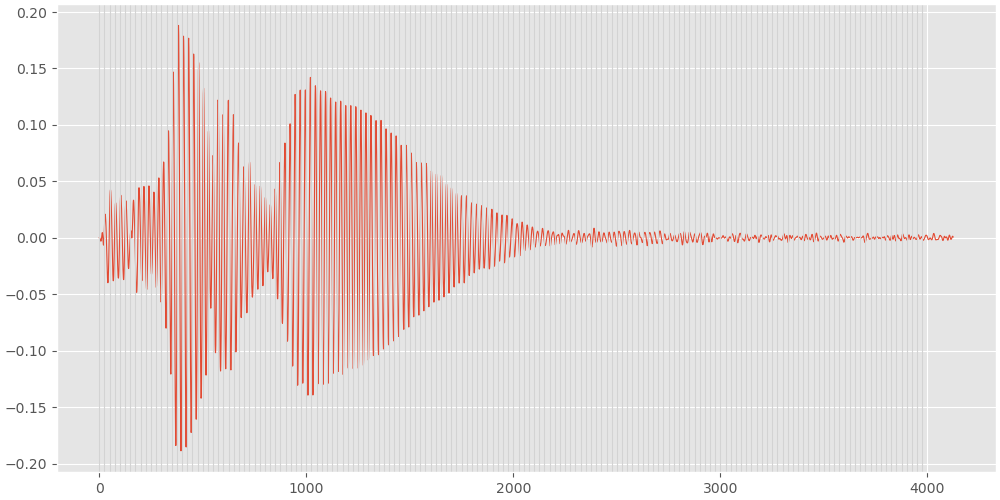

In [96]:
data_in = data_half[:,0]
data_out = data_half[:,1]

data_filt = butter_bandpass_filter(data_out, 20e3, 80e3, 1e6)

ti = 7 * 25e-6
ti_samples = 2*int(ti * 1e6)
print(f"{ti_samples=}")

data_tss = data_filt[:-ti_samples] + data_filt[ti_samples:]

fig, axd = plt.subplot_mosaic([["top"]], sharex=True, figsize=(10,5))
axd["top"].plot(data_filt, c="C0")
# axd["mid"].plot(data_filt[:-ti_samples], c="C0")
# axd["bottom"].plot(data_filt[ti_samples:], c="C0")
# axd["top"].set_xlim([400, 500])

for i in np.arange(0, 4000, 25):
    axd["top"].axvline(i, c="lightgray")
# axd["top"].axvline(200, c="lightgray")

## Generate plot

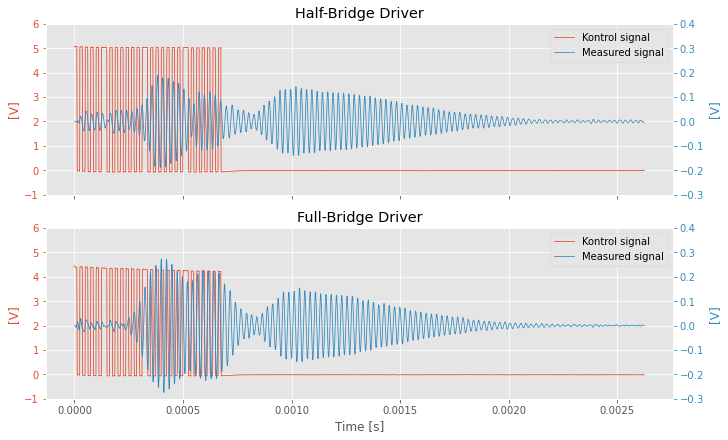

In [4]:
plt.close("all")
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

for ax, data in [(ax1, data_half), (ax2, data_full)]:
    cutoff = -1500
    sigin = data[:cutoff, 0]
    sigout = butter_bandpass_filter(data[:cutoff, 1], 20e3, 80e3, 1e6)
    t = np.arange(len(sigin)) / 1e6
    
    l1, = ax.plot(t, sigin, c="C0", label="Kontrol signal")
    axr = ax.twinx()
    l2, = axr.plot(t, sigout, c="C1", label="Measured signal")
    
    ax.grid(True)
    axr.grid(False)
    
    lines = [l1, l2]
    labels = [l.get_label() for l in lines]
    axr.legend(lines, labels)
    
    ax.tick_params("y", color="C0", labelcolor="C0")
    axr.tick_params("y", color="C1", labelcolor="C1")
    ax.set_ylabel("[V]", c="C0")
    axr.set_ylabel("[V]", c="C1")
    
    ax.set_ylim([-1, 6])
    axr.set_ylim([-0.3, 0.4])
    
ax1.set_title("Half-Bridge Driver")
ax2.set_title("Full-Bridge Driver")
ax2.set_xlabel("Time [s]")

fig.savefig("plots/half_vs_full.pdf")